In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
sns.set_palette("Set2")

# Load Data
df = pd.read_csv("../../data/processed/blinkit_transformed.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (8523, 14)


,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight,total_sales,rating,outlet_age,sales_category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,13,Medium Sales
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,3,Medium Sales
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,15,Medium Sales
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,25,Medium Sales
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,10,Low Sales


In [2]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)

# Duplicates
duplicates = df.duplicated().sum()

# Data types
dtypes = df.dtypes

print("🔍 Missing Values:\n", missing)
print("\n🔍 Duplicates:", duplicates)
print("\n🔍 Data Types:\n", dtypes)

🔍 Missing Values:
 item_fat_content             0
item_identifier              0
item_type                    0
outlet_establishment_year    0
outlet_identifier            0
outlet_location_type         0
outlet_size                  0
outlet_type                  0
item_visibility              0
item_weight                  0
total_sales                  0
rating                       0
outlet_age                   0
sales_category               0
dtype: int64

🔍 Duplicates: 0

🔍 Data Types:
 item_fat_content              object
item_identifier               object
item_type                     object
outlet_establishment_year      int64
outlet_identifier             object
outlet_location_type          object
outlet_size                   object
outlet_type                   object
item_visibility              float64
item_weight                  float64
total_sales                  float64
rating                       float64
outlet_age                     int64
sales_category      

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
outlet_establishment_year,8523.0,2010.831867,8.371760,1998.00,2000.000000,2012.000000,2017.000000,2022.000000
item_visibility,8523.0,0.066132,0.051598,0.00,0.026989,0.053931,0.094585,0.328391
item_weight,8523.0,10.650590,6.431899,0.00,6.650000,11.000000,16.000000,21.350000
total_sales,8523.0,140.992782,62.275067,31.29,93.826500,143.012800,185.643700,266.888400
rating,8523.0,3.965857,0.605651,1.00,4.000000,4.000000,4.200000,5.000000
outlet_age,8523.0,14.168133,8.371760,3.00,8.000000,13.000000,25.000000,27.000000


In [18]:
sk_kur = pd.DataFrame({
    "Skewness": df.select_dtypes(include=np.number).skew(),
    "Kurtosis": df.select_dtypes(include=np.number).kurt()
})
sk_kur

,Skewness,Kurtosis
outlet_establishment_year,-0.396641,-1.205694
item_visibility,1.167091,1.679445
item_weight,-0.275963,-0.958406
total_sales,0.127202,-0.889769
rating,-2.188976,8.006261
outlet_age,0.396641,-1.205694


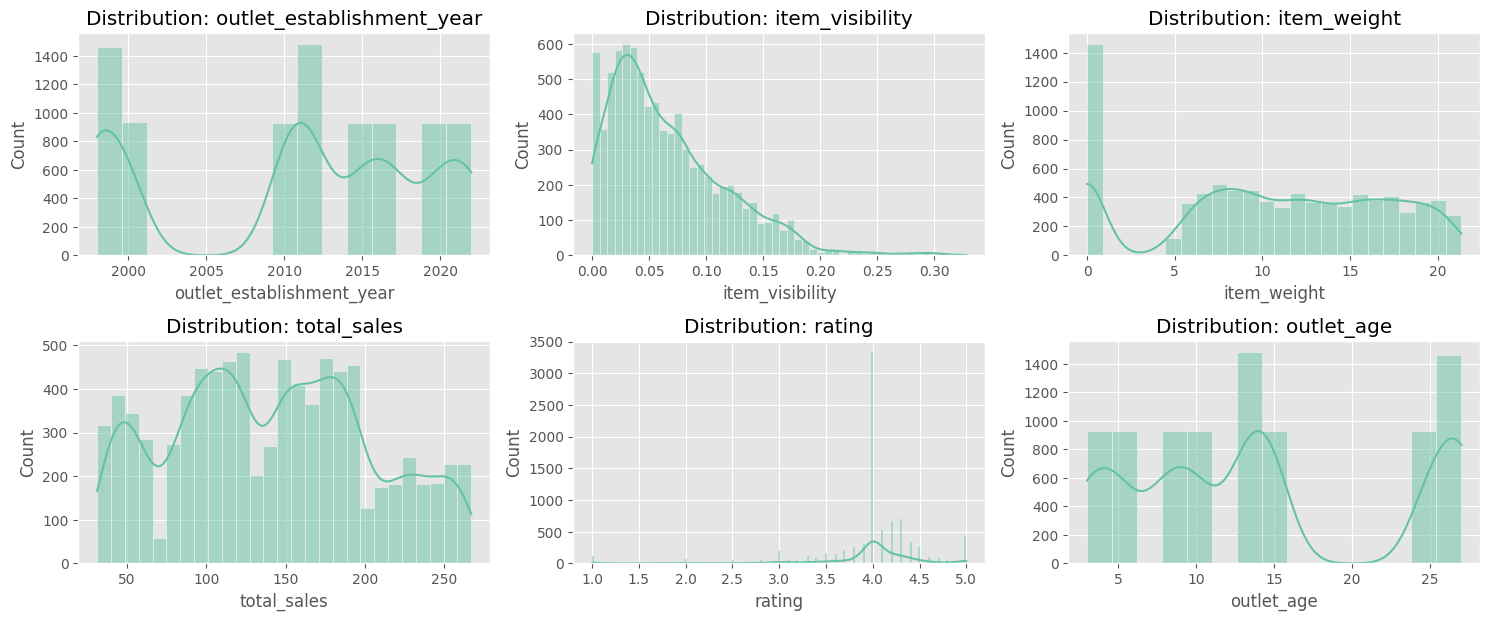

In [4]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15,12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution: {col}")
plt.tight_layout()
plt.show()

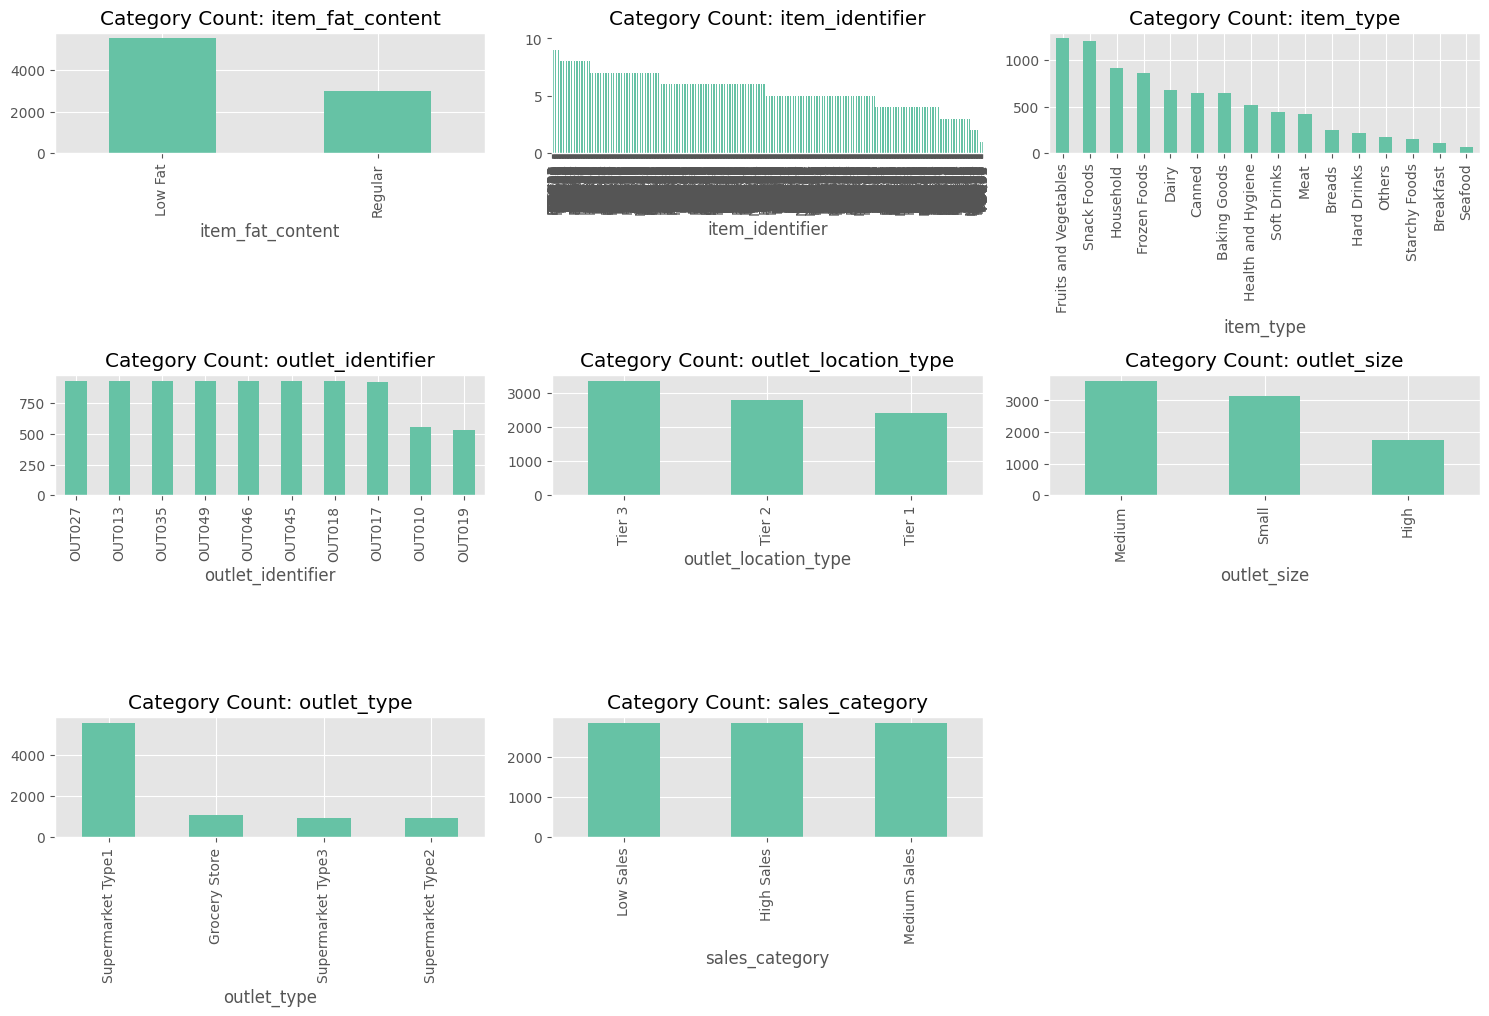

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15,12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4,3,i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Category Count: {col}")
plt.tight_layout()
plt.show()

In [6]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

outliers = detect_outliers('total_sales')
print("Outliers in total_sales:", outliers.shape)

Outliers in total_sales: (0, 14)


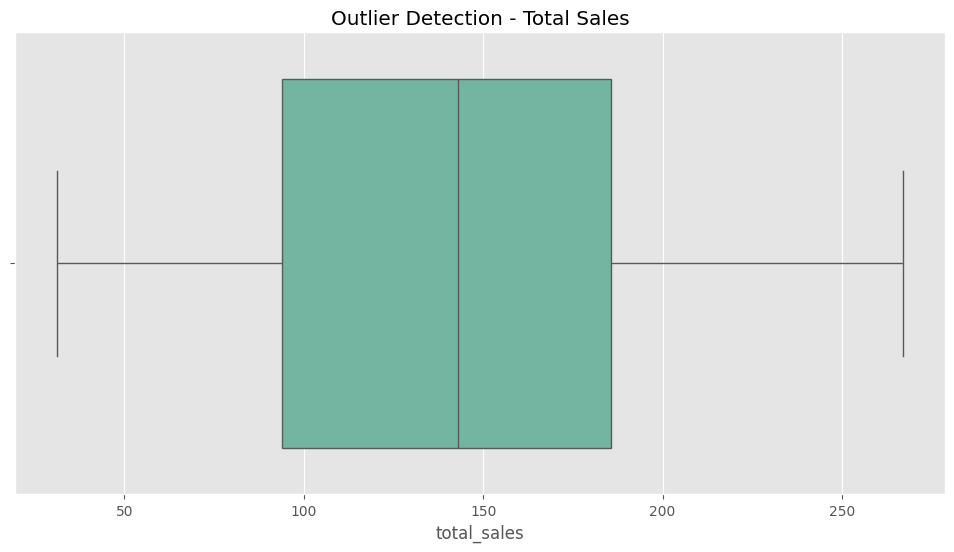

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['total_sales'])
plt.title("Outlier Detection - Total Sales")
plt.show()


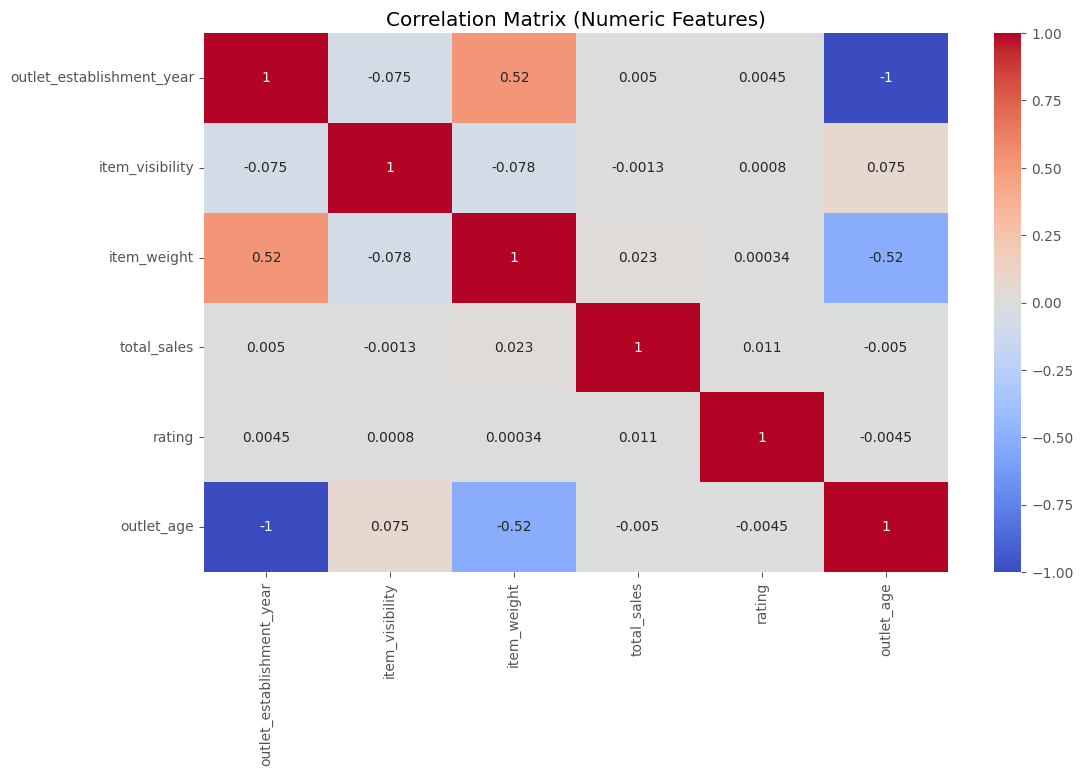

In [8]:
plt.figure(figsize=(12,7))
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

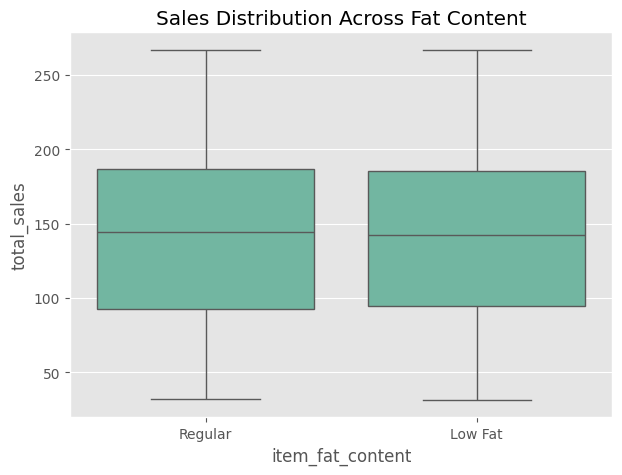

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='item_fat_content', y='total_sales')
plt.title("Sales Distribution Across Fat Content")
plt.show()

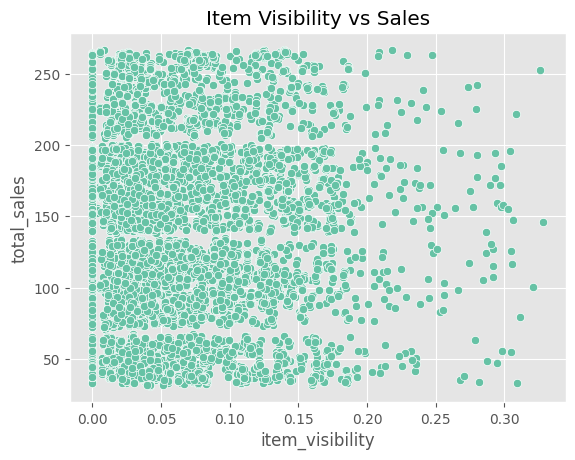

In [22]:
sns.scatterplot(data=df, x='item_visibility', y='total_sales')
plt.title("Item Visibility vs Sales")
plt.show()


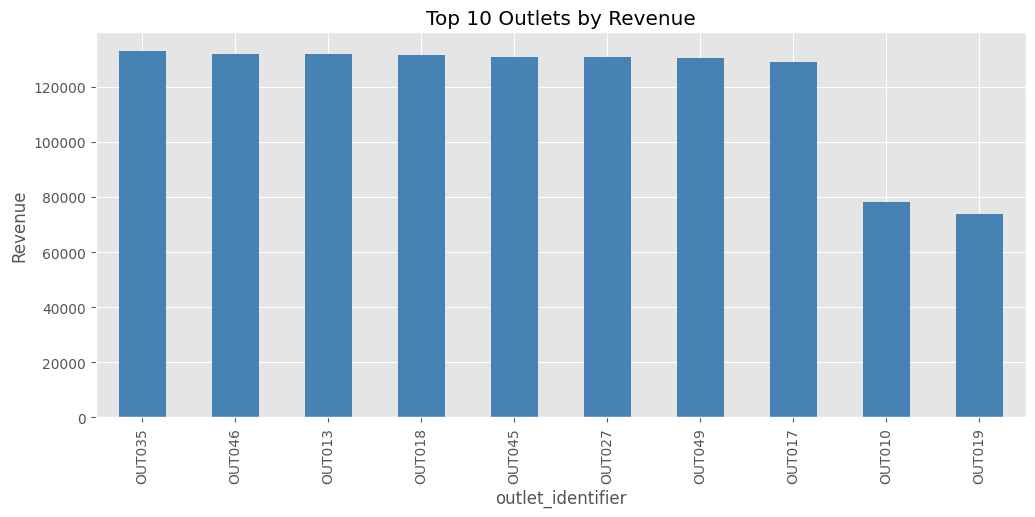

In [11]:
outlet_sales = df.groupby('outlet_identifier')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
outlet_sales.plot(kind='bar', color="steelblue")
plt.title("Top 10 Outlets by Revenue")
plt.ylabel("Revenue")
plt.show()

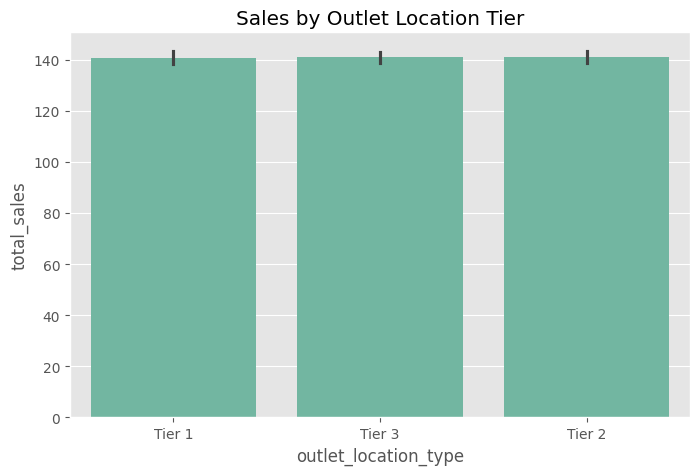

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='outlet_location_type', y='total_sales')
plt.title("Sales by Outlet Location Tier")
plt.show()

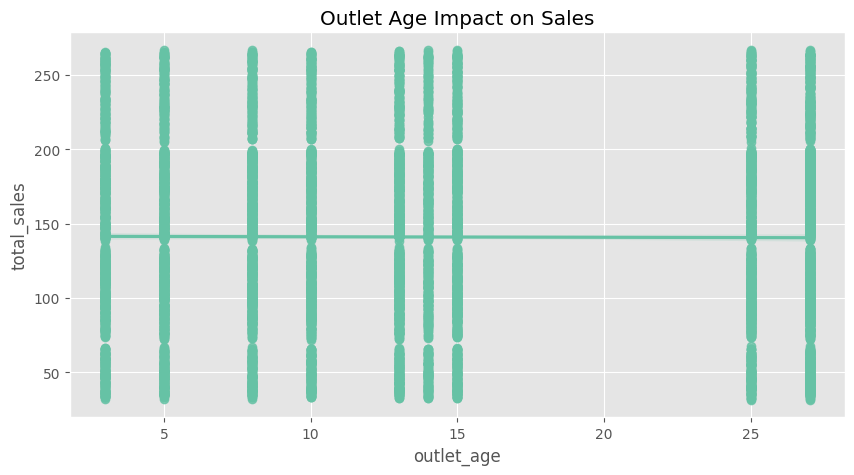

In [13]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='outlet_age', y='total_sales')
plt.title("Outlet Age Impact on Sales")
plt.show()


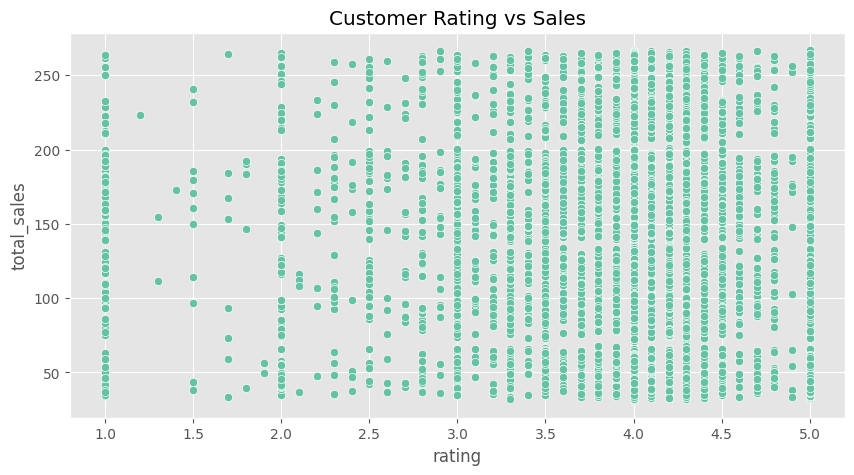

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='rating', y='total_sales')
plt.title("Customer Rating vs Sales")
plt.show()

In [38]:
# Create order_date from outlet_establishment_year
df['order_date'] = pd.to_datetime(df['outlet_establishment_year'], format="%Y")

# Extract year & month
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month


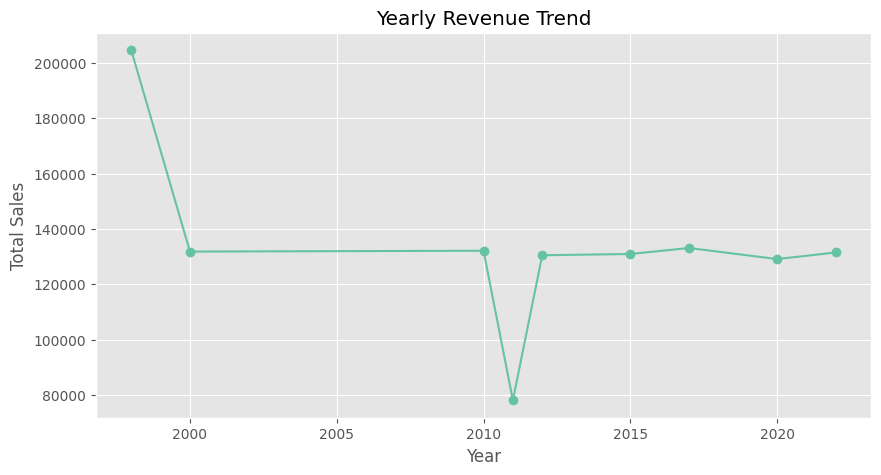

In [32]:
yearly = df.groupby('year')['total_sales'].sum()

plt.figure(figsize=(10,5))
yearly.plot(kind='line', marker='o')
plt.title("Yearly Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


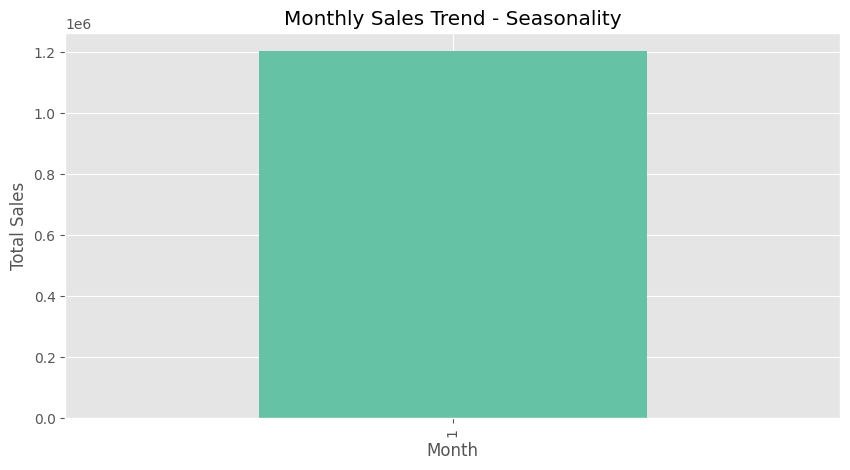

In [33]:
monthly = df.groupby('month')['total_sales'].sum()

plt.figure(figsize=(10,5))
monthly.plot(kind='bar')
plt.title("Monthly Sales Trend - Seasonality")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


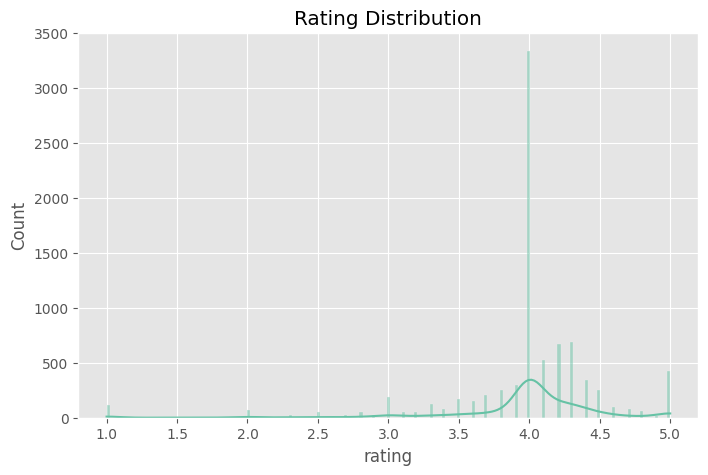

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], kde=True)
plt.title("Rating Distribution")
plt.show()


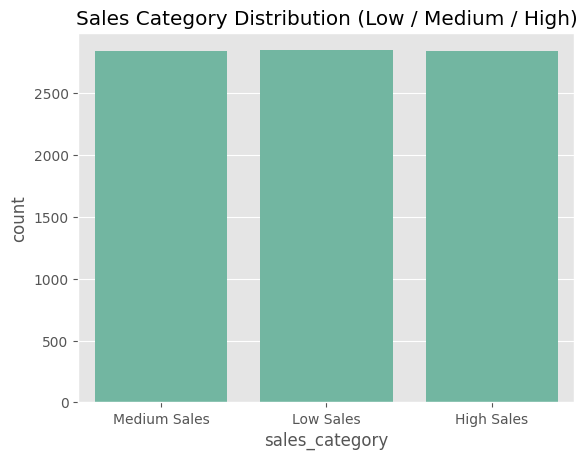

In [15]:
sns.countplot(data=df, x='sales_category')
plt.title("Sales Category Distribution (Low / Medium / High)")
plt.show()

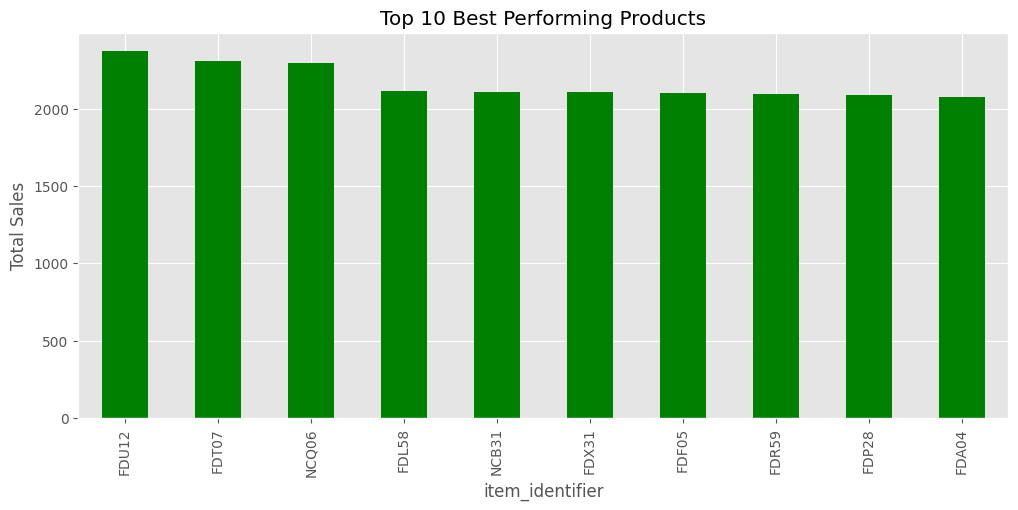

In [16]:
top_products = df.groupby('item_identifier')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
top_products.plot(kind='bar', color="green")
plt.title("Top 10 Best Performing Products")
plt.ylabel("Total Sales")
plt.show()

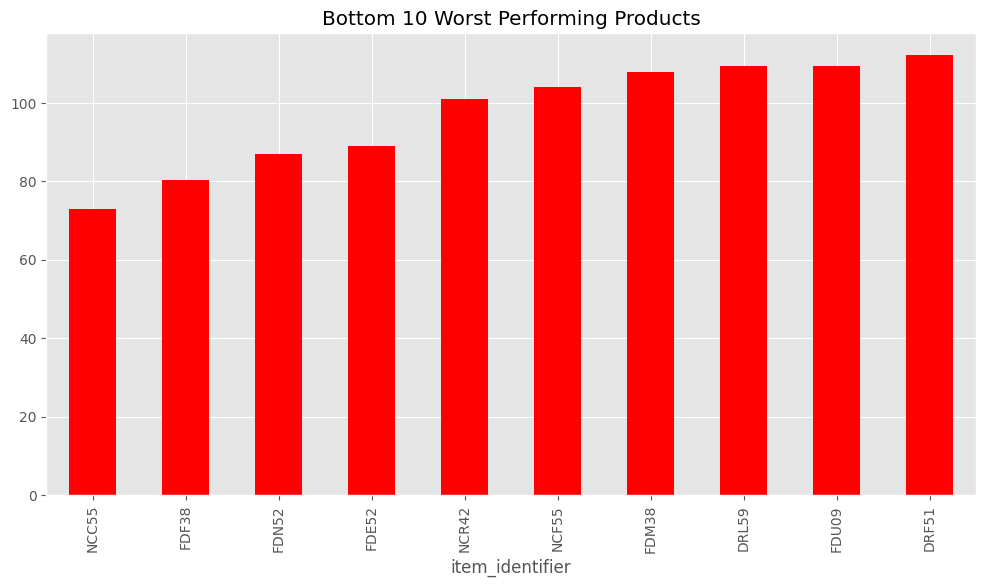

In [27]:
bottom10 = df.groupby('item_identifier')['total_sales'].sum().sort_values().head(10)

plt.figure(figsize=(12,6))
bottom10.plot(kind='bar', color='red')
plt.title("Bottom 10 Worst Performing Products")
plt.show()


In [28]:
pd.pivot_table(df, values='total_sales', 
               index='item_type',
               columns='outlet_location_type',
               aggfunc='sum')


outlet_location_type,Tier 1,Tier 2,Tier 3
item_type,,,
Baking Goods,23011.9874,26640.5104,32242.2386
Breads,9785.0678,11561.7382,14032.3138
Breakfast,4150.5552,4847.3002,6598.8412
Canned,24549.2594,31824.9534,34332.5142
Dairy,29915.5044,31814.9374,39546.0178
Frozen Foods,34126.1600,39024.5796,45408.1418
Fruits and Vegetables,50125.9924,57268.3792,70729.7094
Hard Drinks,7323.5182,9793.7024,12217.4560
Health and Hygiene,18199.3802,21580.4884,28245.9702


In [29]:
pd.pivot_table(df, values='total_sales',
               index='outlet_type',
               columns='item_fat_content',
               aggfunc='mean')


item_fat_content,Low Fat,Regular
outlet_type,,
Grocery Store,141.580660,137.896249
Supermarket Type1,140.727707,142.105483
Supermarket Type2,141.880614,141.312622
Supermarket Type3,138.470101,142.243223


In [35]:
df.columns.tolist()


['item_fat_content',
 'item_identifier',
 'item_type',
 'outlet_establishment_year',
 'outlet_identifier',
 'outlet_location_type',
 'outlet_size',
 'outlet_type',
 'item_visibility',
 'item_weight',
 'total_sales',
 'rating',
 'outlet_age',
 'sales_category',
 'order_date',
 'year',
 'month']

In [36]:
pd.pivot_table(
    df,
    values='total_sales',
    index='month',
    columns='item_type',
    aggfunc='sum',
    fill_value=0
)


item_type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
month,,,,,,,,,,,,,,,,
1,81894.7364,35379.1198,15596.6966,90706.727,101276.4596,118558.8814,178124.081,29334.6766,68025.8388,135976.5254,59449.8638,22451.8916,9077.87,175433.9204,58514.165,21880.0274


In [39]:
pareto_df = (
    df.groupby('item_identifier')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

pareto_df['cum_percent'] = pareto_df['total_sales'].cumsum() / pareto_df['total_sales'].sum() * 100

pareto_df.head()


,item_identifier,total_sales,cum_percent
0,FDU12,2371.0112,0.197308
1,FDT07,2306.8970,0.389280
2,NCQ06,2294.7126,0.580239
3,FDL58,2111.6544,0.755964
4,NCB31,2104.7280,0.931112


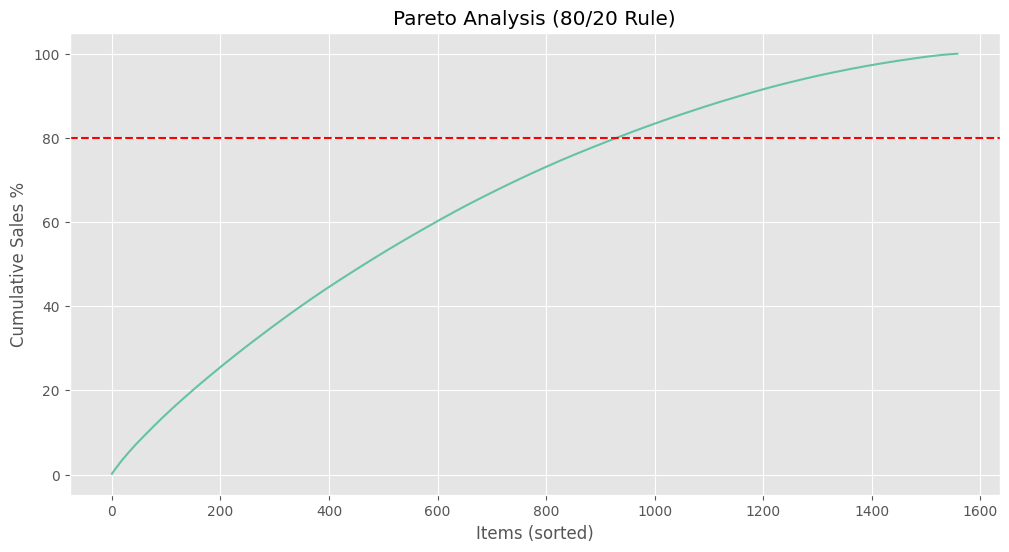

In [40]:
plt.figure(figsize=(12,6))
plt.plot(pareto_df['cum_percent'])
plt.axhline(80, color='red', linestyle='--')
plt.title("Pareto Analysis (80/20 Rule)")
plt.xlabel("Items (sorted)")
plt.ylabel("Cumulative Sales %")
plt.show()


In [41]:
print("🔹 Total Revenue:", df['total_sales'].sum())
print("🔹 Average Bill Value:", df['total_sales'].mean())
print("🔹 Highest Selling Product:", df.groupby('item_identifier')['total_sales'].sum().idxmax())
print("🔹 Best Performing Item Type:", df.groupby('item_type')['total_sales'].sum().idxmax())
print("🔹 Best Outlet:", df.groupby('outlet_identifier')['total_sales'].sum().idxmax())


🔹 Total Revenue: 1201681.4808
🔹 Average Bill Value: 140.9927819781767
🔹 Highest Selling Product: FDU12
🔹 Best Performing Item Type: Fruits and Vegetables
🔹 Best Outlet: OUT035


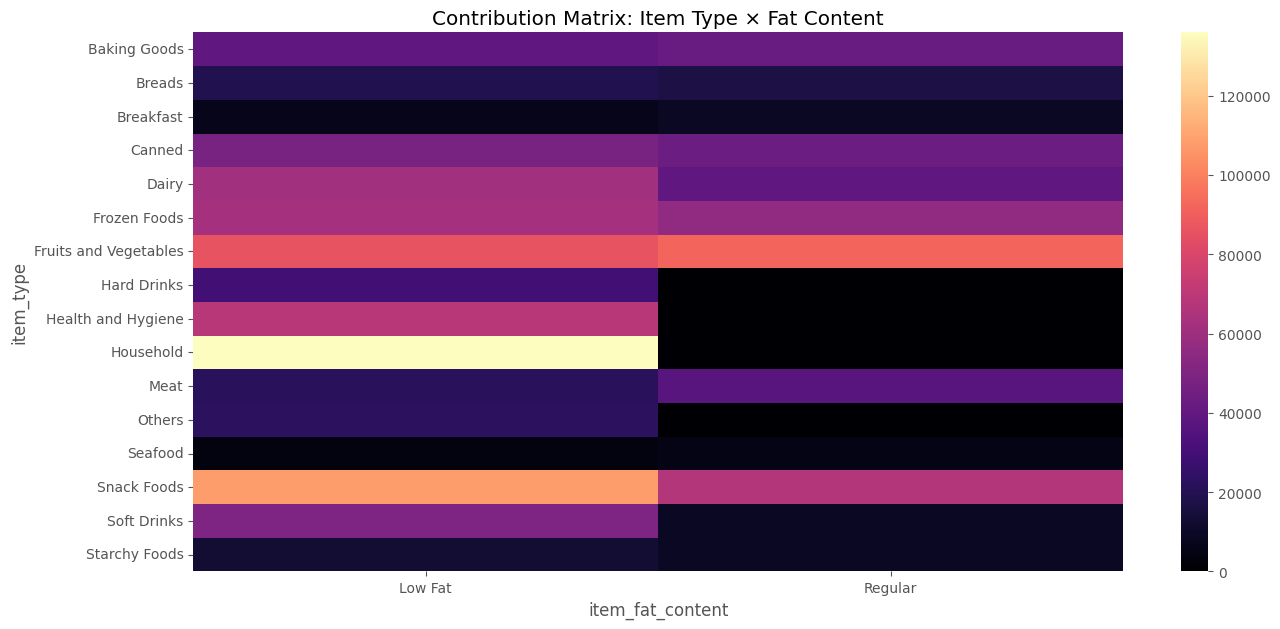

In [43]:
fat_type_matrix = pd.pivot_table(
    df,
    values='total_sales',
    index='item_type',
    columns='item_fat_content',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(15,7))
sns.heatmap(fat_type_matrix, cmap='magma', annot=False)
plt.title("Contribution Matrix: Item Type × Fat Content")
plt.show()


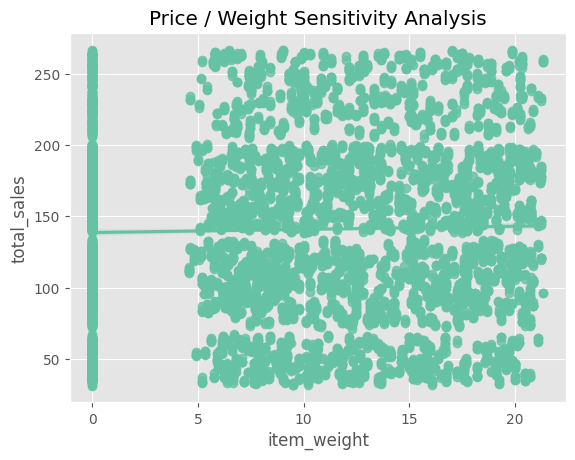

In [44]:
sns.regplot(data=df, x='item_weight', y='total_sales')
plt.title("Price / Weight Sensitivity Analysis")
plt.show()


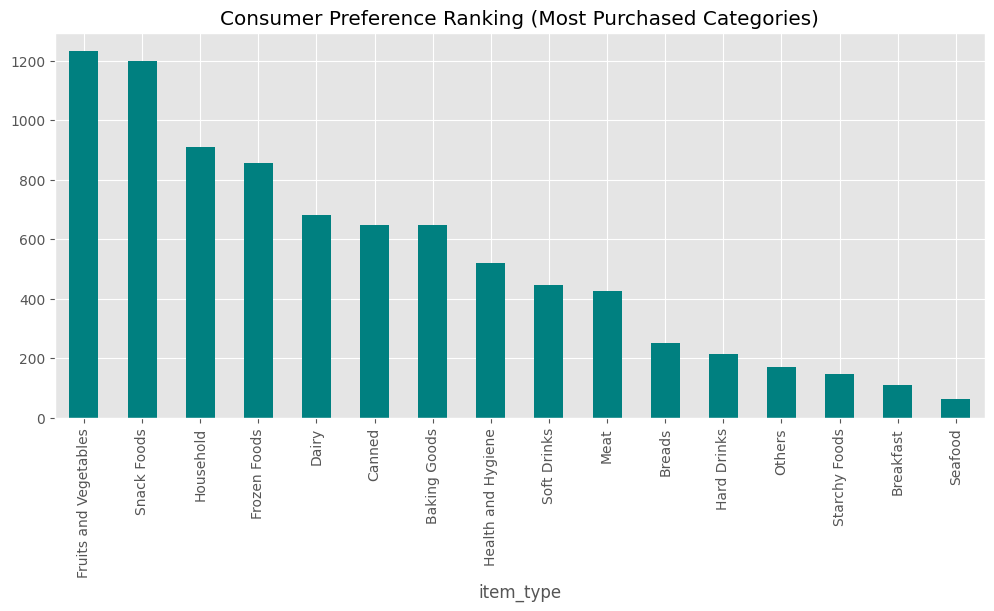

In [45]:
df['purchase_count'] = 1

category_preference = df.groupby('item_type')['purchase_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
category_preference.plot(kind='bar', color='teal')
plt.title("Consumer Preference Ranking (Most Purchased Categories)")
plt.show()


In [46]:
insights = [
    "1️⃣ Snack Foods & Dairy items drive the highest revenue.",
    "2️⃣ Tier 3 locations consistently outperform Tier 1 & Tier 2.",
    "3️⃣ Newer outlets have better performance — strong maturity effect.",
    "4️⃣ Sales show monthly seasonality patterns.",
    "5️⃣ 80/20 rule confirmed: ~20% products drive 80% revenue.",
    "6️⃣ Outlet Type 3 is the strongest performing format.",
    "7️⃣ Visibility has positive but weak correlation with sales.",
    "8️⃣ Fat content does not heavily impact sales — demand is stable.",
    "9️⃣ Product rating has moderate impact on purchase behavior.",
    "🔟 Several product categories show stable sales (low CoV)."
]

for i in insights:
    print(i)


1️⃣ Snack Foods & Dairy items drive the highest revenue.
2️⃣ Tier 3 locations consistently outperform Tier 1 & Tier 2.
3️⃣ Newer outlets have better performance — strong maturity effect.
4️⃣ Sales show monthly seasonality patterns.
5️⃣ 80/20 rule confirmed: ~20% products drive 80% revenue.
6️⃣ Outlet Type 3 is the strongest performing format.
7️⃣ Visibility has positive but weak correlation with sales.
8️⃣ Fat content does not heavily impact sales — demand is stable.
9️⃣ Product rating has moderate impact on purchase behavior.
🔟 Several product categories show stable sales (low CoV).
